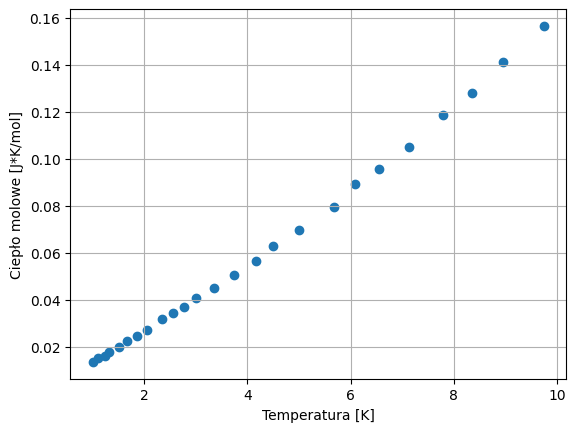

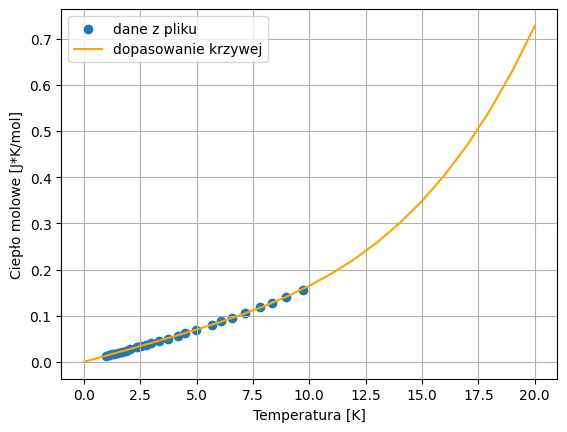

In [16]:
import matplotlib.pyplot as plt
import numpy as np


filename = "Mn.dat"
x, y = np.loadtxt('Mn.dat', unpack=True)
z = 54.94* y
plt.figure()
plt.scatter(x, z, label = 'dane z pliku')
plt.xlabel('Temperatura [K]')
plt.ylabel('Ciepło molowe [J*K/mol]')
plt.grid()


# macierz projektu
A = np.column_stack([x**4, x])

# least squares
(a, b), *_ = np.linalg.lstsq(A, z, rcond=None)
plt.figure()
plt.scatter(x, z, label = 'dane z pliku')
plt.xlabel('Temperatura [K]')
plt.ylabel('Ciepło molowe [J*K/mol]')
plt.grid()
x_int = np.linspace(0, 20, 21)
fit = a* x_int**4 + b*x_int
plt.plot(x_int, fit, label = 'dopasowanie krzywej', color = 'orange')
plt.legend()
